In [12]:
import pandas as pd
df=pd.read_csv("customer_churn_tree_svm (1).csv")
df.head()

,monthly_charges,tenure_months,contract_type,support_calls,churn
0,51.18,15,2,5,0
1,71.09,42,1,2,0
2,33.36,4,0,0,0
3,33.87,51,0,5,0
4,21.10,34,0,5,0


In [13]:
df.isnull().sum()

monthly_charges    0
tenure_months      0
contract_type      0
support_calls      0
churn              0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(150, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  150 non-null    float64
 1   tenure_months    150 non-null    int64  
 2   contract_type    150 non-null    int64  
 3   support_calls    150 non-null    int64  
 4   churn            150 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.0 KB


In [17]:
df.describe()

,monthly_charges,tenure_months,contract_type,support_calls,churn
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,56.650467,28.153333,0.966667,5.546667,0.053333
std,21.928381,17.650118,0.814439,3.517142,0.225450
min,20.450000,1.000000,0.000000,0.000000,0.000000
25%,37.005000,13.000000,0.000000,3.000000,0.000000
50%,56.865000,28.000000,1.000000,5.000000,0.000000
75%,73.805000,44.750000,2.000000,8.750000,0.000000
max,99.270000,59.000000,2.000000,11.000000,1.000000


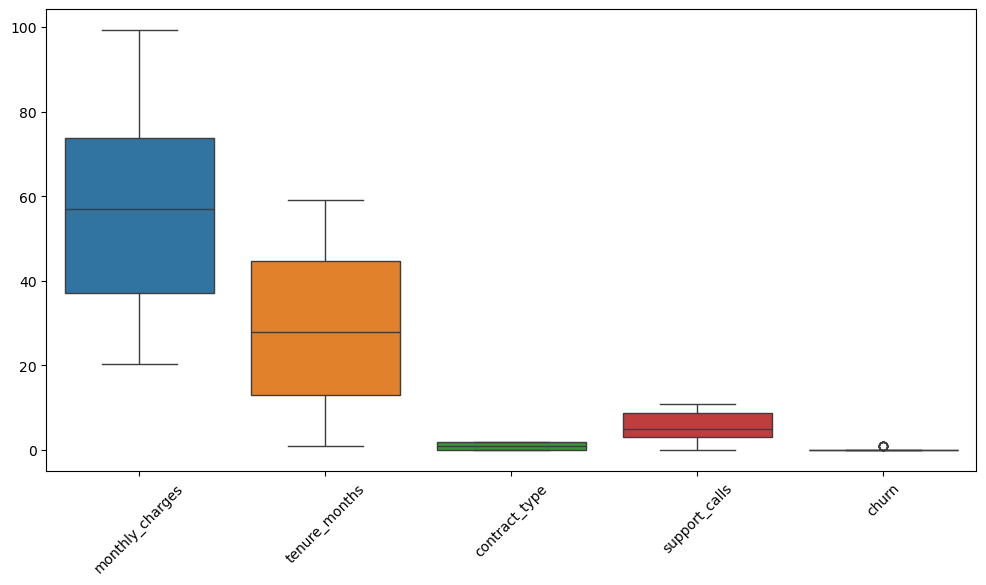

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


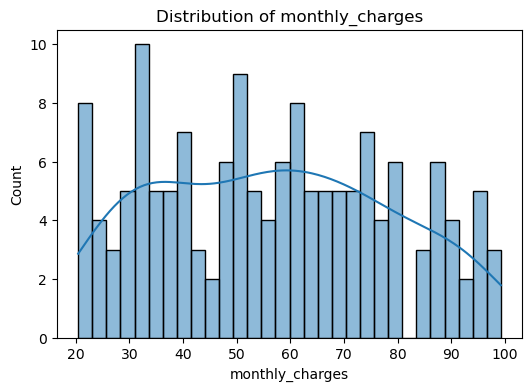

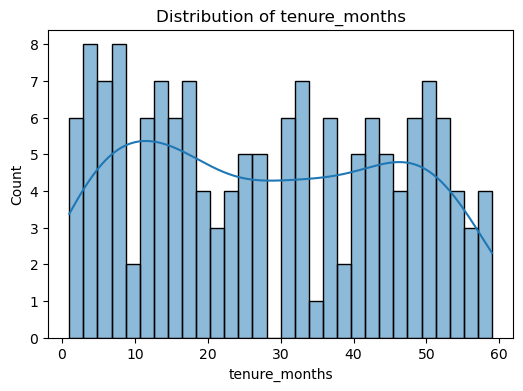

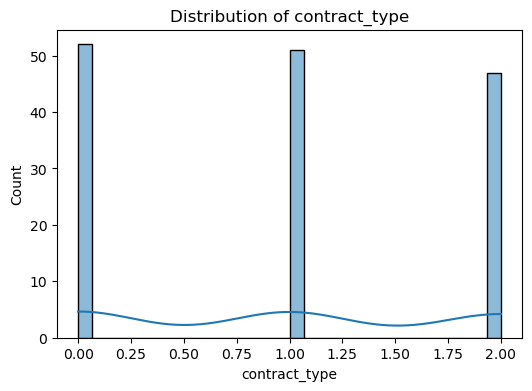

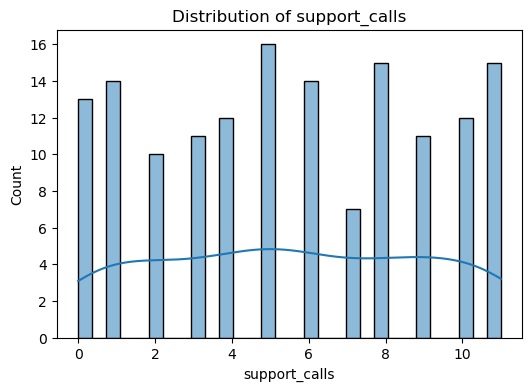

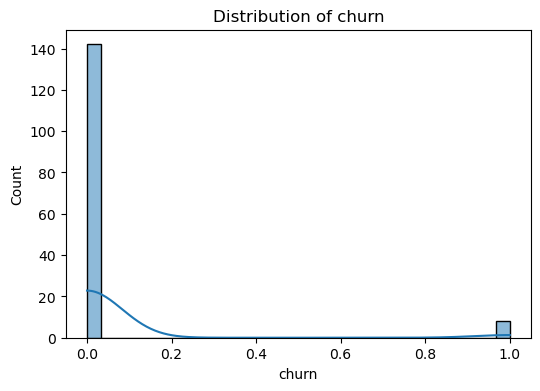

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()



In [20]:
df.skew()

monthly_charges    0.126160
tenure_months      0.083148
contract_type      0.061557
support_calls     -0.003019
churn              4.015991
dtype: float64

Performance metrics: {'svm': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': np.float64(1.0)}, 'decision_tree': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': np.float64(1.0)}}


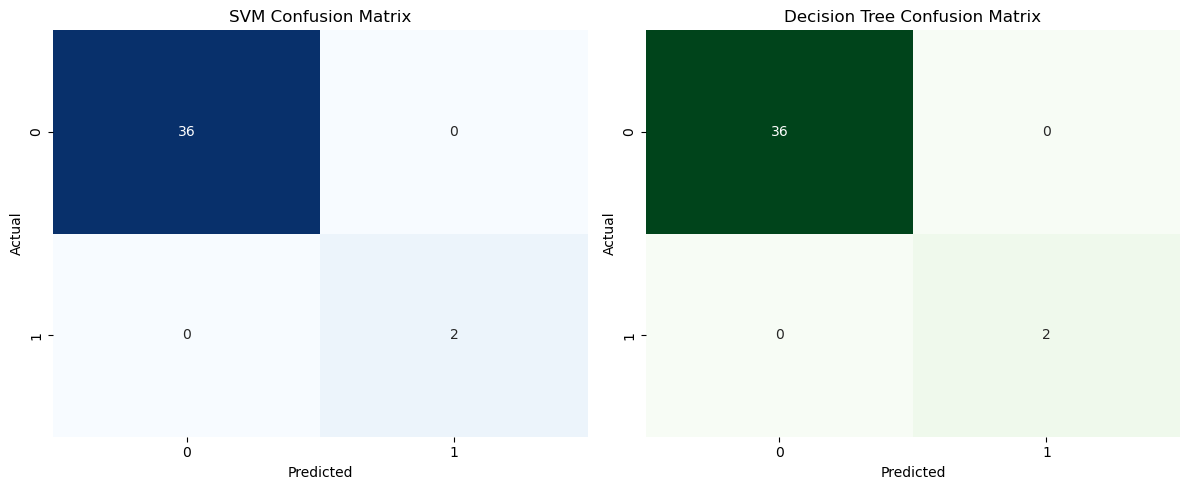

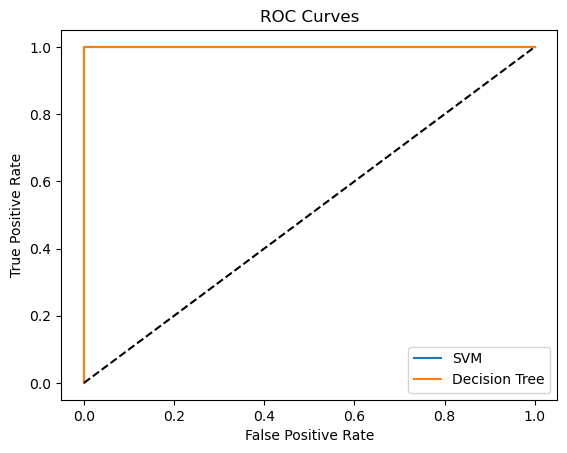

SVM prediction for new customer (0=no churn, 1=churn): 0
Decision Tree prediction for new customer (0=no churn, 1=churn): 0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)


X = df[['monthly_charges', 'tenure_months', 'contract_type', 'support_calls']]
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


svm_preds = svm_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test)

svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]


metrics = {
    'svm': {
        'accuracy': accuracy_score(y_test, svm_preds),
        'precision': precision_score(y_test, svm_preds),
        'recall': recall_score(y_test, svm_preds),
        'f1': f1_score(y_test, svm_preds),
        'roc_auc': roc_auc_score(y_test, svm_probs)
    },
    'decision_tree': {
        'accuracy': accuracy_score(y_test, dt_preds),
        'precision': precision_score(y_test, dt_preds),
        'recall': recall_score(y_test, dt_preds),
        'f1': f1_score(y_test, dt_preds),
        'roc_auc': roc_auc_score(y_test, dt_probs)
    }
}

print("Performance metrics:", metrics)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt="d",
            cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d",
            cmap="Greens", cbar=False, ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


fpr, tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(fpr, tpr, label="SVM")
fpr, tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


new_customer = pd.DataFrame({
    'monthly_charges': [55],
    'tenure_months': [24],
    'contract_type': [2],
    'support_calls': [1]
})


new_customer_scaled = scaler.transform(new_customer)

svm_pred_new = svm_model.predict(new_customer_scaled)[0]
dt_pred_new = dt_model.predict(new_customer)[0]

print("SVM prediction for new customer (0=no churn, 1=churn):", svm_pred_new)
print("Decision Tree prediction for new customer (0=no churn, 1=churn):", dt_pred_new)


In [22]:
import pickle

# Save SVM, Decision Tree, and Scaler
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("dt_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Models and scaler saved successfully!")


Models and scaler saved successfully!
